<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula20c_cost_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.19668516 0.60248077] -0.04017846716692319


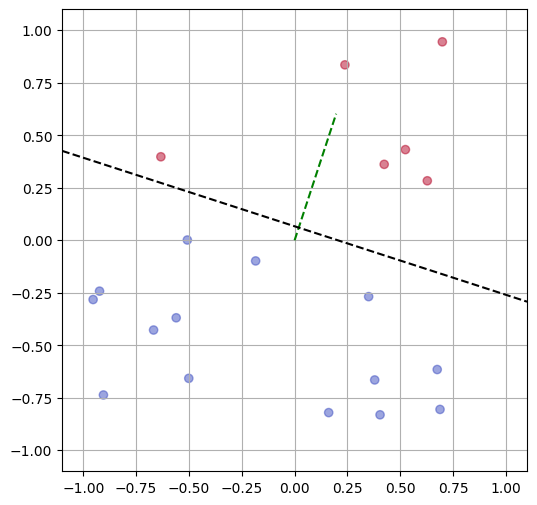

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_separable_dataset(n_samples, weights, bias):
    n_features = len(weights)
    X = np.random.rand(n_samples, n_features)*2-1
    y = np.sign(np.dot(X, weights) + bias)
    return X, y

def plot_dataset(X, y, xlim=(-1.1, 1.1), ylim=(-1.1, 1.1)):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', alpha=0.5, cmap="coolwarm")
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.grid(True)

def plot_vector(weights):
    xs = [0, weights[0]]
    ys = [0, weights[1]]p
    plt.plot(xs, ys, 'g--')

def plot_hyperplane(weights, bias):
    xs = np.array([-1.1, 1.1])
    ys = -(weights[0]*xs + bias)/weights[1]
    plt.plot(xs, ys, 'k--')

weights = np.random.rand(2)
weights /= np.linalg.norm(weights)
weights = weights*2-1
bias = (np.random.rand()-0.5)/2
print(weights, bias)

X, y = generate_linear_separable_dataset(20, weights, bias)
plot_dataset(X, y)
plot_vector(weights)
plot_hyperplane(weights, bias)
plt.show()

In [ ]:
from abc import ABC, abstractmethod

class CostFunction(ABC):
    @abstractmethod
    def getCost(self, y, ypred):
        pass
    @abstractmethod
    def getGradient(self, X):
        pass

class WidrowHoff(CostFunction):
    def getCost(self, y, ypred):
        self.error = y - ypred
        return 0.5 * np.sum(self.error**2)
    def getGradient(self, X):
        return -X.T @ self.error

In [ ]:
from abc import ABC, abstractmethod

class Algorithm(ABC):
    @abstractmethod
    def getW(self, X, y):
        pass


class GradientDescent(Algorithm):
    def __init__(self, max_iter, learning_rate,
                 cost_function=WidrowHoff()):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.cost_function = cost_function

    def getW(self, X, y):
        w = np.random.rand(X.shape[1])
        for _ in range(self.max_iter):
            ypred = X @ w
            cost = self.cost_function.getCost(y, ypred)
            w -= self.learning_rate * self.cost_function.getGradient(X)
            if cost == 0:
                break
        return w

[0.3408039  1.40051165] -0.13931586559715137
1.0


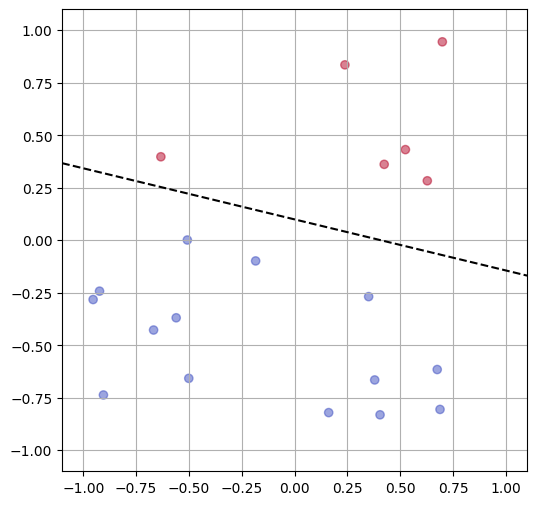

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  ones = np.ones(shape=(X.shape[0],1))
  return np.hstack((ones, X))

class NeuralNetwork(BaseEstimator, ClassifierMixin):
  def __init__(self, algorithm):
    self.algorithm = algorithm

  def fit(self, X, y):
    X = include_bias(X)
    self.w = self.algorithm.getW(X, y)
    self.coefs_ = self.w[1:]
    self.intercept_ = self.w[0]
    return self

  def predict(self, X):
    X = include_bias(X)
    ypred = (X @ self.w)
    return np.sign(ypred)


model = NeuralNetwork(algorithm=GradientDescent(100, 0.01))
model.fit(X, y)
print(model.coefs_, model.intercept_)
ypred = model.predict(X)
print(accuracy_score(y, ypred))
plot_dataset(X, y)
plot_hyperplane(model.coefs_, model.intercept_)
plt.show()

[0.10804612 0.60051124] 0.048484986749598155
1.0


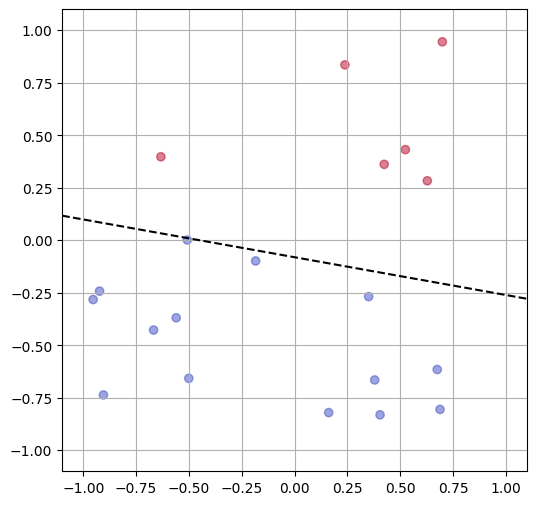

In [ ]:
class SmoothSurrogate(CostFunction):
    def getCost(self, y, ypred):
        self.error = y - np.sign(ypred)
        return np.sqrt(np.sum(self.error**2))
    def getGradient(self, X):
        return -X.T @ self.error

model = NeuralNetwork(algorithm=GradientDescent(100, 0.01, SmoothSurrogate()))
model.fit(X, y)
print(model.coefs_, model.intercept_)
ypred = model.predict(X)
print(accuracy_score(y, ypred))
plot_dataset(X, y)
plot_hyperplane(model.coefs_, model.intercept_)
plt.show()